## 🧪 3.3. Validación Cruzada Aleatoria (ShuffleSplit)

**ShuffleSplit** es una técnica de validación cruzada que ofrece una alternativa intermedia entre el *Holdout simple* y el *K-Fold*.

###  ¿Cómo funciona?

- Se realizan **múltiples divisiones aleatorias** del dataset (por ejemplo, 10 veces).
- En cada división, se entrena el modelo con una parte del dataset y se valida con otra.
- Al final, se **promedian los resultados** de todas las iteraciones.

 Es como hacer **muchos Holdouts aleatorios**, pero de forma automática y controlada.

###  Ventajas:
- Más representativo que un solo Holdout.
- Permite controlar el porcentaje de entrenamiento y prueba.
- Útil cuando el orden de los datos no importa.



# Preparación del dataset y modelo

In [3]:
# Paso 1: Importamos librerías necesarias
from sklearn.datasets import make_regression             # Generamos datos sintéticos
from sklearn.linear_model import LinearRegression        # Modelo base
from sklearn.model_selection import ShuffleSplit, cross_val_score



# Generar un dataset artificial con 100 muestras y 1 sola característica

In [6]:
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=0)

# Definir el modelo de regresión lineal

In [9]:

modelo = LinearRegression()

Aplicar validación con ShuffleSplit

In [10]:
# Paso 4: Configurar ShuffleSplit
# 10 repeticiones → n_splits=10
# En cada repetición, el 20% de los datos será usado para prueba
# random_state=42 para reproducibilidad
ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Paso 5: Evaluar el modelo usando validación cruzada con ShuffleSplit
# cross_val_score entrena y evalúa el modelo 10 veces
# Por defecto, la métrica usada es R² (scoring='r2')
scores = cross_val_score(modelo, X, y, cv=ss)

# Paso 6: Mostrar el resultado promedio
print(f"Promedio R² (ShuffleSplit): {scores.mean():.2f}")


Promedio R² (ShuffleSplit): 0.86


###  Interpretación de los resultados

El modelo fue entrenado y validado 10 veces con divisiones aleatorias distintas del dataset.

- Cada vez, el 80% de los datos se usó para entrenamiento y el 20% para prueba.
- Los valores obtenidos representan el desempeño del modelo en distintos escenarios aleatorios.
- El **promedio de R²** nos da una estimación robusta del rendimiento del modelo.

 A diferencia de K-Fold, aquí no se garantiza que cada dato se use una vez.  
Sin embargo, esta técnica es **más rápida y más aleatoria**, útil cuando queremos evaluar rápidamente sin estructura fija.


# Visualización de los splits de ShuffleSplit
###  ¿Qué muestra esta visualización?

Cada fila representa una división aleatoria de los datos generada por **ShuffleSplit**.

- 🟦 Azul: datos utilizados para **entrenamiento** en ese split.
- 🟧 Naranja: datos utilizados para **prueba** en ese split.

A diferencia de K-Fold, las divisiones aquí son **totalmente aleatorias** y **no garantizan cobertura uniforme**.  
Es decir, algunos datos pueden ser seleccionados varias veces, y otros quizás nunca.

Este enfoque permite realizar múltiples evaluaciones aleatorias del modelo, simulando distintas situaciones posibles.


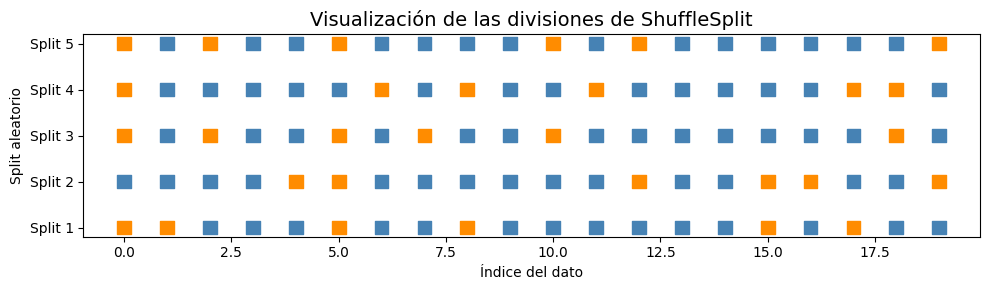

In [11]:
# Paso 7: Visualización de las divisiones generadas por ShuffleSplit

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ShuffleSplit

# Número total de muestras (para visualización clara)
n_samples = 20
X_demo = np.arange(n_samples).reshape(-1, 1)
y_demo = np.random.rand(n_samples)

# Definimos el esquema ShuffleSplit (5 divisiones para mostrar visualmente)
ss_demo = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Creamos la figura
plt.figure(figsize=(10, 3))
plt.title("Visualización de las divisiones de ShuffleSplit", fontsize=14)

# Dibujamos cada split
for i, (train_idx, test_idx) in enumerate(ss_demo.split(X_demo)):
    # Inicializamos todos los puntos como grises
    colores = np.full(n_samples, 'lightgray', dtype=object)

    # Asignamos colores por tipo de conjunto
    colores[train_idx] = 'steelblue'     # Entrenamiento = azul
    colores[test_idx] = 'darkorange'     # Prueba = naranja

    # Dibujamos la fila de puntos para este split
    plt.scatter(range(n_samples), [i]*n_samples, c=colores, s=100, marker='s')

# Etiquetas
plt.xlabel("Índice del dato")
plt.ylabel("Split aleatorio")
plt.yticks(range(5), [f'Split {i+1}' for i in range(5)])
plt.grid(False)
plt.tight_layout()
plt.show()


# Visualizar frecuencia de aparición en test set (ShuffleSplit)

###  ¿Qué muestra esta visualización?

Este gráfico de barras indica **cuántas veces** cada dato fue seleccionado como parte del conjunto de prueba (`test`) durante las divisiones aleatorias realizadas por **ShuffleSplit**.

 Observaciones clave:

- Algunos datos fueron seleccionados muchas veces.
- Otros quizás pocas o ninguna.
- Esto ocurre porque las divisiones son **aleatorias e independientes**.

 A diferencia de K-Fold (donde todos los datos se usan exactamente una vez para prueba), en ShuffleSplit no hay garantía de cobertura uniforme. Sin embargo, su flexibilidad y rapidez lo hacen muy útil en la práctica, especialmente cuando se quiere simular múltiples escenarios posibles.





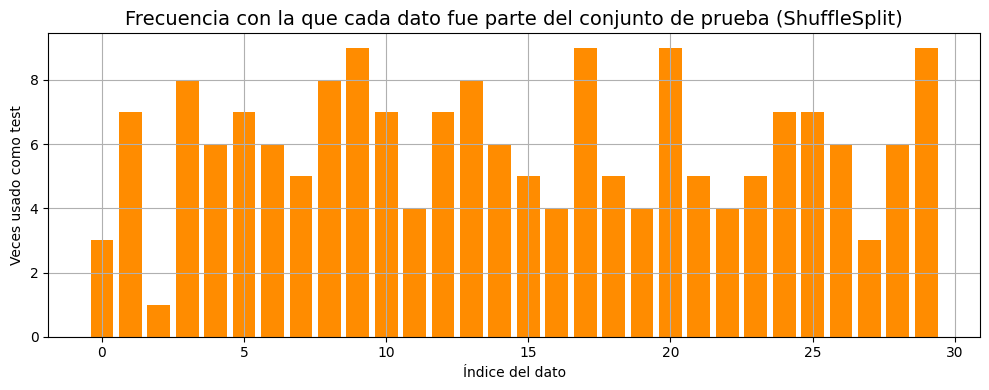

In [12]:
# Paso 8: Visualizar cuántas veces cada muestra fue seleccionada como prueba (test)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ShuffleSplit

# Definimos el número de muestras
n_samples = 30
X_demo = np.arange(n_samples).reshape(-1, 1)

# Creamos esquema ShuffleSplit con más repeticiones para que se note la frecuencia
ss = ShuffleSplit(n_splits=20, test_size=0.3, random_state=42)

# Inicializamos un contador de frecuencia por muestra
frecuencia_test = np.zeros(n_samples, dtype=int)

# Contamos cuántas veces cada muestra fue usada como prueba
for _, test_index in ss.split(X_demo):
    frecuencia_test[test_index] += 1

# Graficamos la frecuencia de uso como test
plt.figure(figsize=(10, 4))
plt.bar(range(n_samples), frecuencia_test, color='darkorange')
plt.title("Frecuencia con la que cada dato fue parte del conjunto de prueba (ShuffleSplit)", fontsize=14)
plt.xlabel("Índice del dato")
plt.ylabel("Veces usado como test")
plt.grid(True)
plt.tight_layout()
plt.show()
